In [82]:
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib import ticker

In [22]:
dirname = './lzb-test-1-16/'
betas = [0, 45, 90, 135]
alphas = np.arange(0, 190, 10, dtype=int)

In [41]:
means = np.zeros((len(betas), len(alphas)))
stds  = np.zeros((len(betas), len(alphas)))

i = 0
for b in betas: 
    j = 0
    for a in alphas: 
        data = np.loadtxt(os.path.join(dirname, f'{a}-{b}.txt'))
        mean = np.mean(data, axis=0)[-1]
        std  = np.std(data, axis=0)[-1]
        means[i, j] = mean
        stds[i, j]  = std

        j += 1
    i += 1

array([[1148.56666667,  967.16666667,  811.83333333,  637.25      ,
         446.7       ,  288.53333333,  139.33333333,   55.66666667,
          36.21666667,   73.48333333,  177.2       ,  312.33333333,
         481.4       ,  677.        ,  843.05      ,  961.81666667,
        1040.71666667, 1059.03333333, 1022.5       ],
       [ 869.71666667,  967.25      , 1025.96666667, 1030.16666667,
         975.96666667,  889.26666667,  760.98333333,  597.45      ,
         441.51666667,  281.1       ,  173.36666667,  101.6       ,
          89.28333333,  123.38333333,  212.51666667,  326.88333333,
         501.05      ,  596.45      ,  786.41666667],
       [  82.61666667,  192.3       ,  324.11666667,  495.21666667,
         659.3       ,  809.63333333,  927.33333333,  987.1       ,
         990.26666667,  939.48333333,  834.16666667,  693.85      ,
         545.6       ,  366.28333333,  209.03333333,  102.43333333,
          40.35      ,   33.35      ,   80.85      ],
       [ 312.71666667,

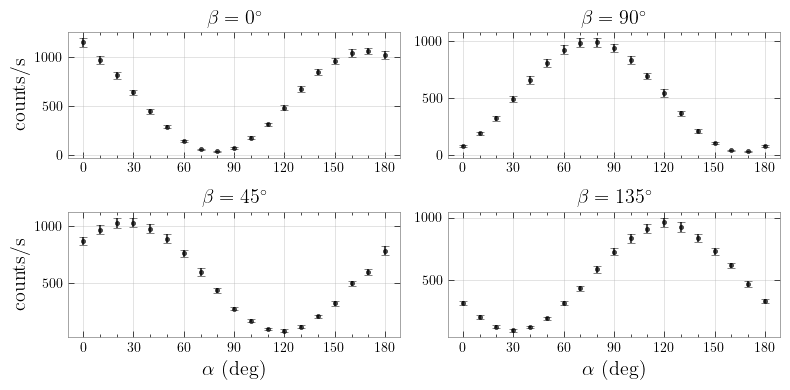

In [95]:
beta_grid = np.reshape(betas, (2,2))

fig, ax = plt.subplots(nrows=np.shape(beta_grid)[0], ncols=np.shape(beta_grid)[1], 
					   figsize=(8,4))

i = 0
for i in range(np.shape(beta_grid)[0]):
	for j in range(np.shape(beta_grid)[1]):

		k = 2 * j + i

		ax[i, j].errorbar(alphas, means[k, :], yerr=stds[k, :], 
					fmt='o', 
					ms=3, 
					alpha=0.7,
					capsize=3, 
					color='black')

		ax[i, j].set_title(f'$\\beta = {betas[k]}^\\circ$')
		ax[i, j].xaxis.set_major_locator(ticker.MultipleLocator(30))
		ax[i, j].xaxis.set_minor_locator(ticker.MultipleLocator(10))

		if j == 0: 
			ax[i, j].set_ylabel('counts/s')

		if i == 1:
			ax[i, j].set_xlabel('$\\alpha$ (deg)')

plt.tight_layout()
plt.savefig('./fig/acquisition.pdf')
plt.savefig('./fig/acquisition.png')